In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.special import logsumexp
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.decomposition import PCA 
import sklearn.metrics as metric

C:\Users\bhara\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
MAX_ITER = 100

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
label_encoder = preprocessing.LabelEncoder() 
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df2 = df.iloc[:, [1]]
df = df.drop(columns=['CustomerID'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [6]:
df = df.drop(columns=['Gender'])
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [7]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [8]:
scaled_features_df = scaled_features_df.join(df2)
scaled_features_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [9]:
mall_df = df.join(df2)
mall_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [10]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_features_df)
pca_data

array([[-0.60043766, -1.73717898],
       [-1.64988591, -1.78912423],
       [ 0.31538132, -1.69277231],
       [-1.47798868, -1.78131664],
       [-0.06054496, -1.67869121],
       [-1.5029612 , -1.7438065 ],
       [ 1.07202103, -1.58773793],
       [-1.94718878, -1.72769057],
       [ 2.65927595, -1.4504641 ],
       [-0.99141027, -1.64691155],
       [ 2.50988817, -1.45931005],
       [-1.47785399, -1.67316678],
       [ 1.98742066, -1.47928386],
       [-1.43412929, -1.62698028],
       [ 1.01549562, -1.4775323 ],
       [-1.55292967, -1.59402762],
       [ 0.27232193, -1.5119479 ],
       [-1.2997754 , -1.54249961],
       [ 1.33203751, -1.35564719],
       [-1.45726454, -1.51942393],
       [ 0.30455257, -1.3581841 ],
       [-1.24333274, -1.42787781],
       [ 1.644869  , -1.29854428],
       [-0.94101737, -1.37824333],
       [ 1.79852122, -1.18081367],
       [-1.29406171, -1.27973079],
       [ 0.84929965, -1.22201945],
       [-0.41464999, -1.24030551],
       [ 0.6216485 ,

C:\Users\bhara\AppData\Local\Temp\ipykernel_8848\1361593217.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, S, 'bo-', color='black')


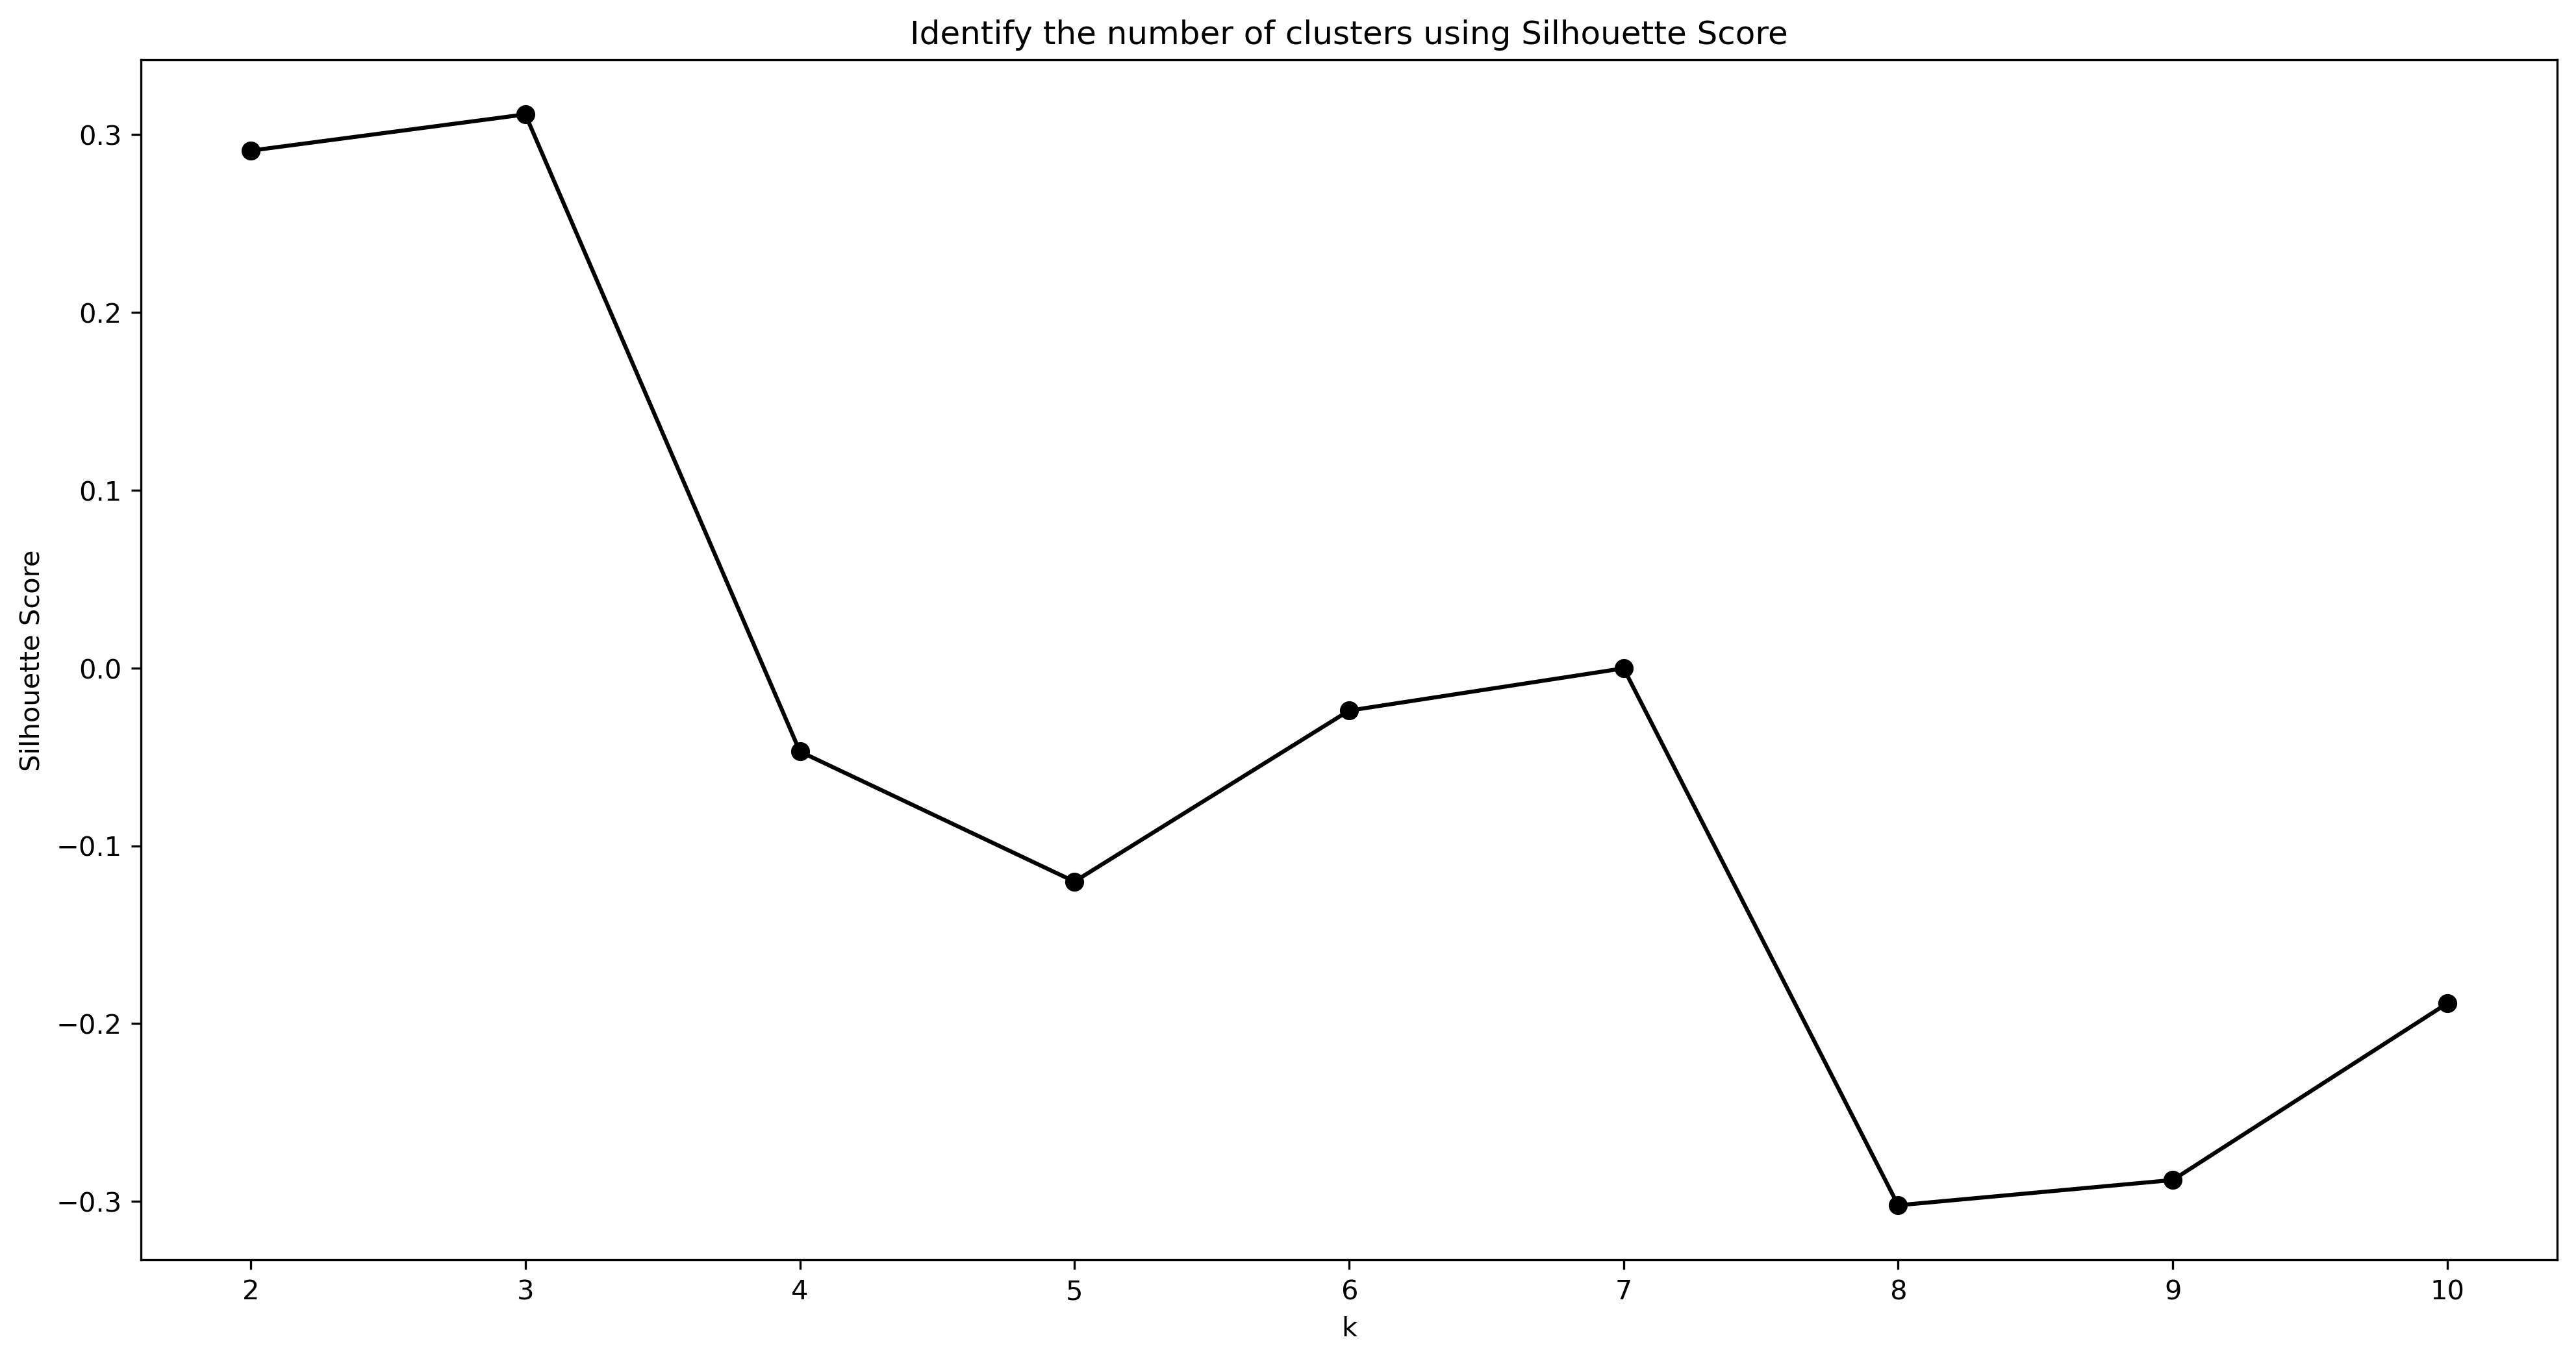

In [11]:

# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = mall_df

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=10, init_params='random_from_data', random_state=42)
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metric.silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [21]:
model1 = GaussianMixture(n_components=3, init_params='random_from_data', max_iter=MAX_ITER, random_state=42)
model1.fit(df)
yhat1 = model1.predict(df)

In [22]:
print('Normal:-')
print('silhouette_score:        ', metric.silhouette_score(df, yhat1))
print('davies_bouldin_score:    ', metric.davies_bouldin_score(df, yhat1))
print('calinski_harabasz_score: ', metric.calinski_harabasz_score(df, yhat1))

Normal:-
silhouette_score:         0.2342257283450566
davies_bouldin_score:     1.2959701110791537
calinski_harabasz_score:  52.34810467305448


In [23]:
model2 = GaussianMixture(n_components=3, init_params='random_from_data', max_iter=MAX_ITER, random_state=42)
model2.fit(scaled_features_df)
yhat2 = model2.predict(scaled_features_df)


In [24]:
print('Scaled:-')
print('silhouette_score:        ', metric.silhouette_score(scaled_features_df, yhat2))
print('davies_bouldin_score:    ', metric.davies_bouldin_score(scaled_features_df, yhat2))
print('calinski_harabasz_score: ', metric.calinski_harabasz_score(scaled_features_df, yhat2))

Scaled:-
silhouette_score:         0.2148387815934006
davies_bouldin_score:     1.281307865413783
calinski_harabasz_score:  55.47011186994967


In [25]:
model3 = GaussianMixture(n_components=3, init_params='random_from_data', max_iter=MAX_ITER, random_state=42)
model3.fit(pca_data)
yhat3 = model3.predict(pca_data)

In [26]:
print('PCA:-')
print('silhouette_score:        ', metric.silhouette_score(pca_data, yhat2))
print('davies_bouldin_score:    ', metric.davies_bouldin_score(pca_data, yhat2))
print('calinski_harabasz_score: ', metric.calinski_harabasz_score(pca_data, yhat2))

PCA:-
silhouette_score:         0.2701500008961127
davies_bouldin_score:     0.9839539893303163
calinski_harabasz_score:  79.28977251619676


In [27]:
pca_df = pd.DataFrame(pca_data)
pca_df['predicted_clusters'] = yhat3

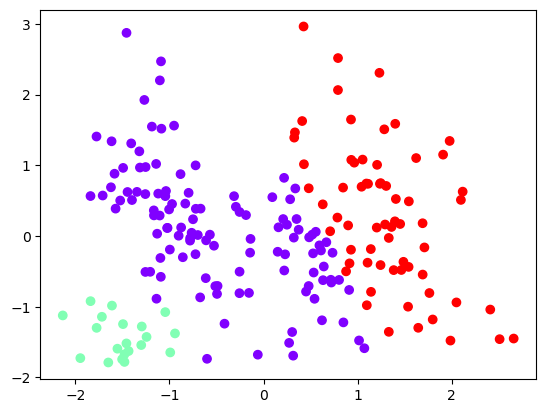

In [28]:
plt.scatter(pca_df[0], pca_df[1], c=pca_df['predicted_clusters'], cmap='rainbow')

In [20]:
#plt.scatter(pca_df[0], pca_df[1], c=scaled_features_df['predicted_clusters'], cmap='rainbow')